# Reading log files from the RaspberryPi Pico2

In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt

### import file from SD card under LittleFS

In [2]:
!~/bin/lfs /dev/mmcblk0 card

In [3]:
!cp card/speed_test.dat .

In [4]:
!umount card

block size = 16 byte

In [5]:
block_type = np.dtype([("timestamp", np.int32), ("a", np.int32), ("b", np.int64)])

In [6]:
data = np.fromfile("speed_test.dat", dtype=block_type)

In [7]:
data.shape

(36447,)

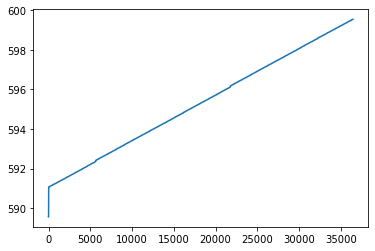

In [8]:
timestamp = data['timestamp']
plt.plot(1e-6*timestamp)
plt.show()

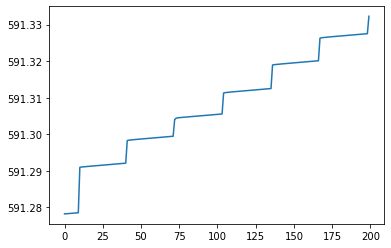

In [10]:
plt.plot(1e-6*timestamp[1000:1200])
plt.show()

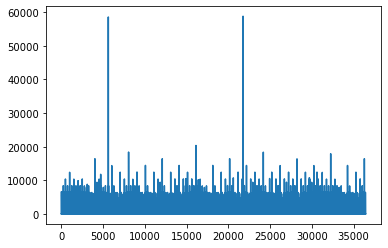

In [19]:
timestamp = data['timestamp']
spacing = (timestamp[1:] - timestamp[:-1])
plt.plot(spacing[10:])
plt.show()

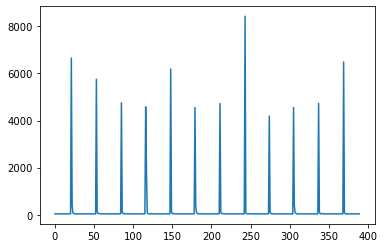

In [21]:
plt.plot(spacing[10:400])
plt.show()

In [25]:
spacing.shape

(36446,)

In [35]:
np.histogram(spacing, bins=40, range=(0,20000))

(array([35207,     0,     0,    40,     0,     0,     0,    45,    49,
          570,     1,   150,   260,     2,     0,     5,    45,     1,
            5,     1,    25,     4,     0,     1,    15,     0,     0,
            0,     8,     0,     0,     0,     5,     0,     0,     1,
            2,     0,     0,     0]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000., 10500., 11000., 11500.,
        12000., 12500., 13000., 13500., 14000., 14500., 15000., 15500.,
        16000., 16500., 17000., 17500., 18000., 18500., 19000., 19500.,
        20000.]))

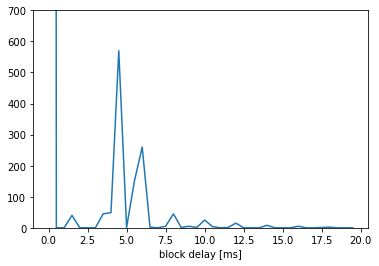

In [34]:
h = np.histogram(spacing, bins=40, range=(0,20000))
plt.plot(1e-3*h[1][:-1],h[0])
plt.ylim(0,700)
plt.xlabel('block delay [ms]')
plt.show()

In [22]:
help(np.histogram)

Help on _ArrayFunctionDispatcher in module numpy:

histogram(a, bins=10, range=None, density=None, weights=None)
    Compute the histogram of a dataset.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string, it defines the method used to calculate the
        optimal bin width, as defined by `histogram_bin_edges`.
    
    range : (float, float), optional
        The lower and upper range of the bins.  If not provided, range
        is simply ``(a.min(), a.max())``.  Values outside the range are
        ignored. 